
Name: JOEL RAJU

Batch: R1

Date: 10-04-2023

Term Work:Next word prediction using LSTM


Given three words of a sentence, it should predict next word. I am using LSTM (Long-Short Term Memory) here.


Note: LSTM comes under Recurrent Neural Network (RNN) architecture used in the field of deep learning. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate.

Step 1: Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

Step 2: Load your file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pride and prejudice.txt to Pride and prejudice.txt


Step 3: Open and pre-process the data

In [ ]:
file = open("Pride and prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

733851

Step 4: Apply tokenization and some other changes

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 182, 164, 1001, 3, 299, 4, 946, 30, 72, 710, 41, 1001, 23, 21]

In [ ]:
len(sequence_data)

131237

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7251


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  131234


array([[   1,  182,  164, 1001],
       [ 182,  164, 1001,    3],
       [ 164, 1001,    3,  299],
       [1001,    3,  299,    4],
       [   3,  299,    4,  946],
       [ 299,    4,  946,   30],
       [   4,  946,   30,   72],
       [ 946,   30,   72,  710],
       [  30,   72,  710,   41],
       [  72,  710,   41, 1001]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  182  164]
 [ 182  164 1001]
 [ 164 1001    3]
 [1001    3  299]
 [   3  299    4]
 [ 299    4  946]
 [   4  946   30]
 [ 946   30   72]
 [  30   72  710]
 [  72  710   41]]
Response:  [1001    3  299    4  946   30   72  710   41 1001]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Step 5: Creating the mode

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72510     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7251)              7258251   
                                                                 
Total params: 20,379,761
Trainable params: 20,379,761
Non-trainable params: 0
_________________________________________________________________


Step 6: Plot the mode

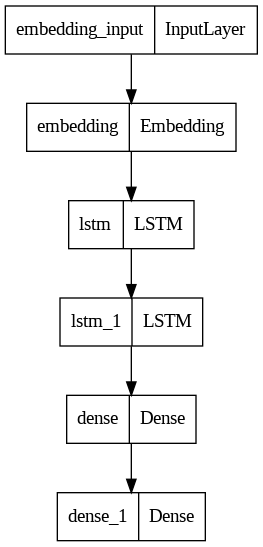

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

Step 7: Train the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=METRICS)
r=model.fit(X, y, epochs=50, batch_size=64,callbacks=[checkpoint])

Epoch 1/50
2051/2051 [==============================] - ETA: 0s - loss: 6.2170 - accuracy: 0.0606 - precision: 0.6905 - recall: 2.2098e-04
Epoch 1: loss improved from inf to 6.21697, saving model to next_words.h5
2051/2051 [==============================] - 51s 20ms/step - loss: 6.2170 - accuracy: 0.0606 - precision: 0.6905 - recall: 2.2098e-04
Epoch 2/50
2051/2051 [==============================] - ETA: 0s - loss: 5.6106 - accuracy: 0.1026 - precision: 0.7304 - recall: 0.0059
Epoch 2: loss improved from 6.21697 to 5.61056, saving model to next_words.h5
2051/2051 [==============================] - 36s 18ms/step - loss: 5.6106 - accuracy: 0.1026 - precision: 0.7304 - recall: 0.0059
Epoch 3/50
2051/2051 [==============================] - ETA: 0s - loss: 5.2944 - accuracy: 0.1211 - precision: 0.7319 - recall: 0.0127
Epoch 3: loss improved from 5.61056 to 5.29435, saving model to next_words.h5
2051/2051 [==============================] - 35s 17ms/step - loss: 5.2944 - accuracy: 0.1211 - pr

Model Testing/ Evaluation

In [ ]:
import matplotlib.pyplot as plt

Recall vs. Precision Thresholding

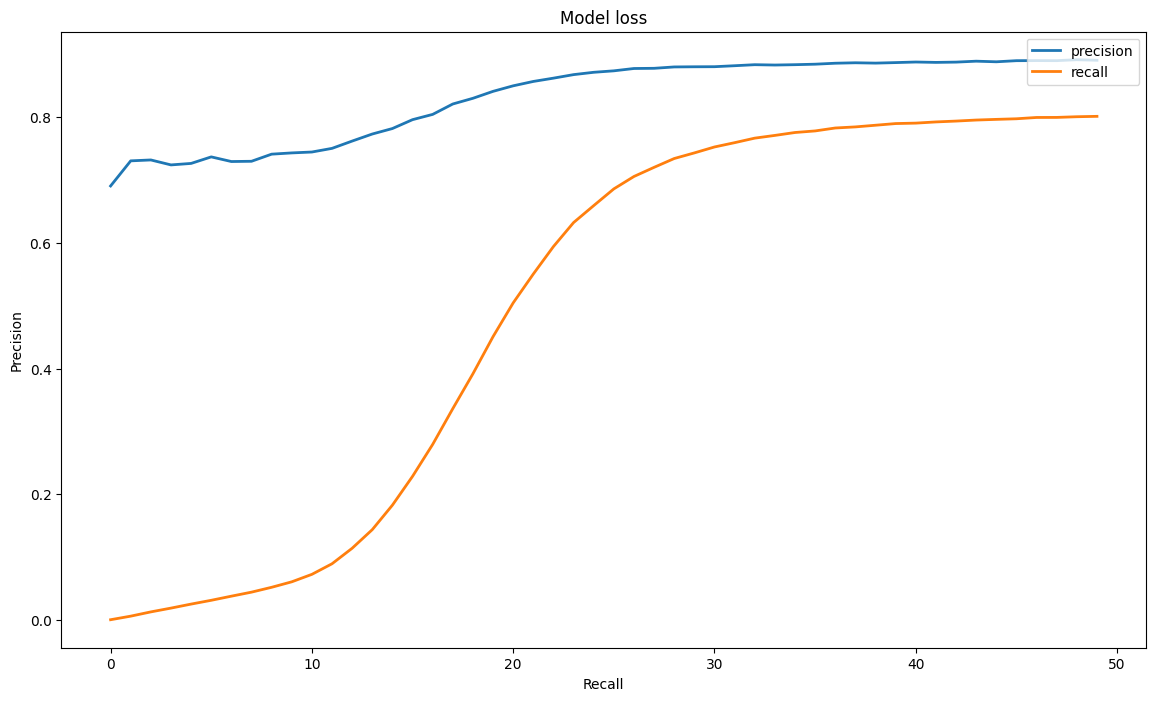

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(r.history['precision'], linewidth=2, label='precision')
plt.plot(r.history['recall'], linewidth=2, label='recall')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Precision')
plt.xlabel('Recall')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()


Model Loss

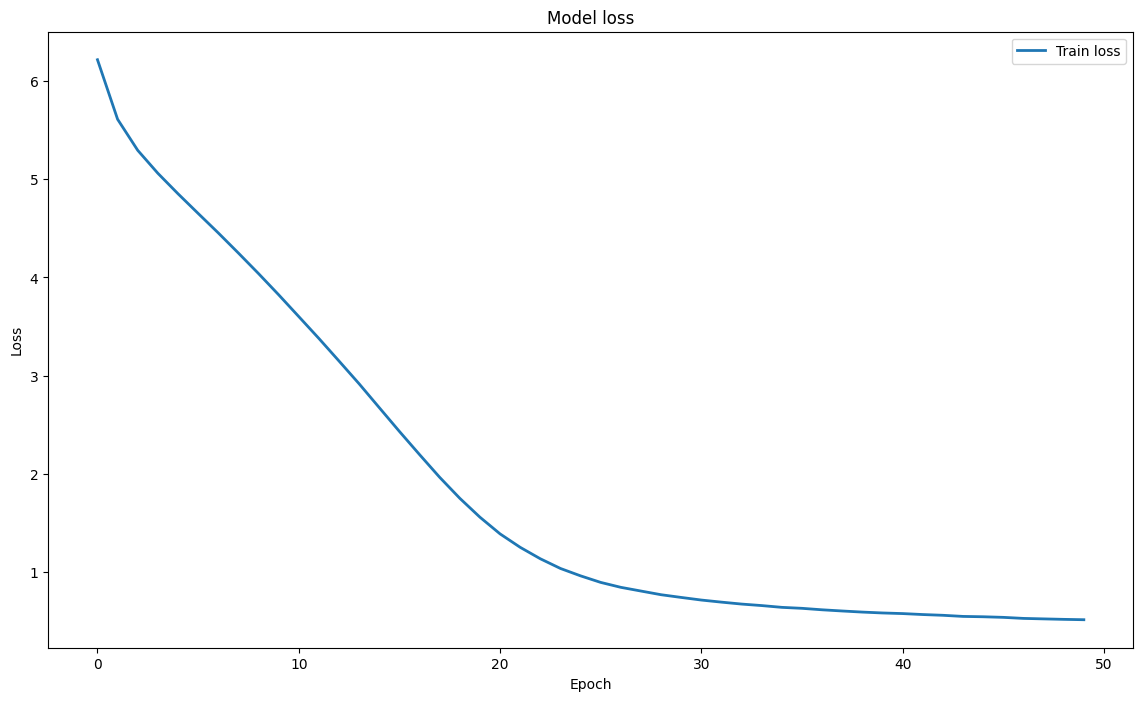

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(r.history['loss'], linewidth=2, label='Train loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

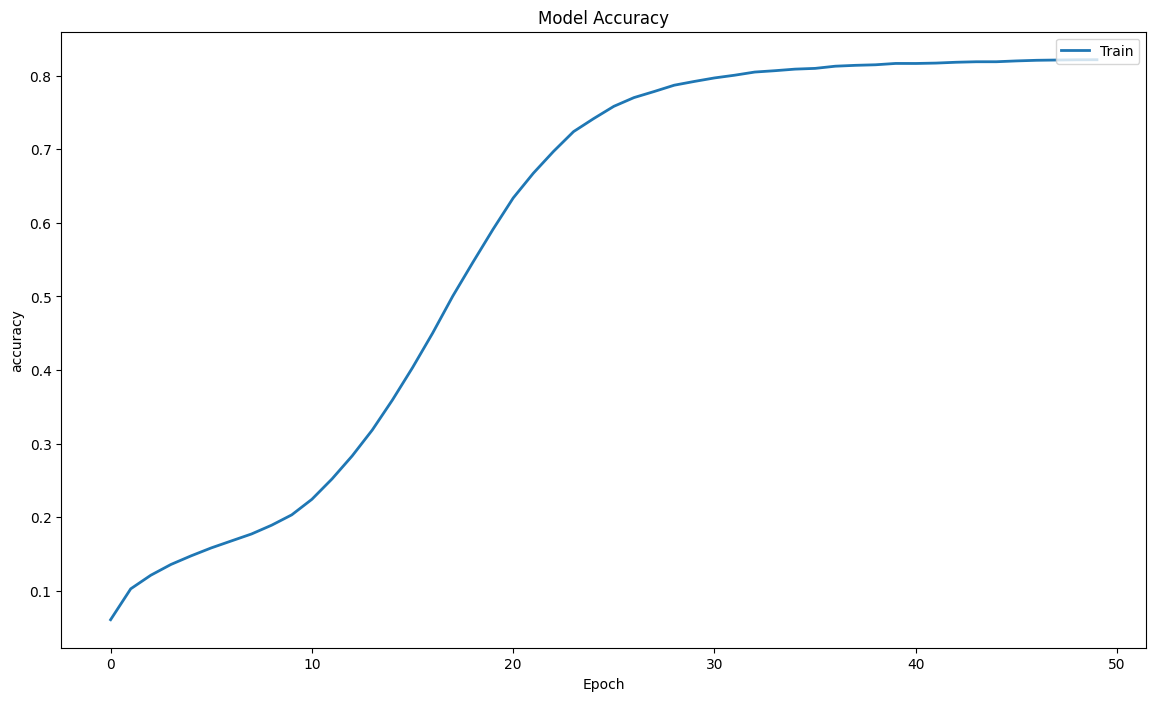

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(r.history['accuracy'], linewidth=2, label='Train')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

Step 8: Let's predict

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: 1
['1']
1/1 [==============================] - 0s 19ms/step
e
Enter your line: 2
['2']
1/1 [==============================] - 0s 21ms/step
they
Enter your line: 4
['4']
1/1 [==============================] - 0s 20ms/step
and
Enter your line: 5
['5']
1/1 [==============================] - 0s 20ms/step
darcy
Enter your line: 0
Execution completed.....
